<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf

## Creating new data to view it

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

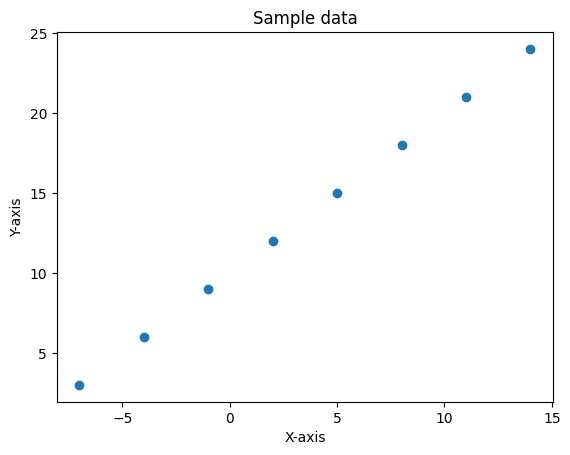

In [3]:
plt.scatter(X,y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample data")
plt.show()

In [4]:
y == X + 10 # from this we can tell that the equation of the line would be y = X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# our input and output shapes are going to be 1
X[0].shape, y[0].shape # its showing nothing cause when we are accesing 1 value from an array it returns a scalar.

((), ())

In [6]:
X[0].ndim # this shows that it is a scalar

0

In [7]:
# turning the numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in creating a model in tensorflow
1. **Creating the model** - defining the input, output layers and alos the hidden layers.
2. **Compiling the model** - defining the loss function that will correct out model, choosing the optimzer that tells our model how to improve the patterns it is learning and evaluation metrics thats tells us the performance of our model.
3. **Fitting the model** - Letting the model find patterns in X and y which are our features and labels.

In [48]:
X.ndim, tf.expand_dims(X, axis=-1).ndim

(1, 2)

In [28]:
x_new = tf.expand_dims(X, axis=-1)
x_new[1,0]

<tf.Tensor: shape=(), dtype=float64, numpy=-4.0>

In [49]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model.fit(X,y,epochs=5) # since i have provided the input size i do not need to change the tensor to 2 dimensions

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - loss: 15.6170 - mae: 15.6170
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 15.3358 - mae: 15.3358
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 15.0545 - mae: 15.0545
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 14.8376 - mae: 14.8376
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14.7051 - mae: 14.7051


In [45]:
# predicting using a sample value
chumma = tf.constant([[17.0]]) # make sure the input is always a tensor
model.predict(chumma) # this is when the epochs is 5, has a MAE of 7.4738

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[29.220205]], dtype=float32)

# Improving the Model
Places to improve the model -
1. **Creating a model**- in this step in order to improve our model we may increase the **number of hidden layers**, we may **increase the number of neurons per layer** or change our **activation function** (in this case its linear by default).
2.**Compiling the model** - here we might the change the optmization function or the **learning rate**.
3. **Fitting a model** - here we might increase the number of **epochs** or give the model more **data**.

In [51]:
# Improving the model only by increasing the epoch number

In [61]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model_epoch = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_epoch.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model_epoch.fit(tf.expand_dims(X, axis=-1),y,epochs=100) # Since i have not proved the input shape,
# i will have to convert my 1 dimensional tensor to 2 dimensions

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - loss: 18.4773 - mae: 18.4773
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 18.1961 - mae: 18.1961
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 17.9148 - mae: 17.9148
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 17.6336 - mae: 17.6336
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 17.3523 - mae: 17.3523
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 17.0711 - mae: 17.0711
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 16.7898 - mae: 16.7898
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 16.5086 - mae: 16.5086
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 16.2273 - mae: 16.2273
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 15.9461 - mae: 15.9461
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 15.6648 - mae: 15.6648
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 15.3836 - mae: 15.3836
Epoch 13/100
1/1 ━━

In [62]:
chumma = tf.constant([[17.0]])
model_epoch.predict(chumma) # this is when the epochs was 100, has a MAE of 6.8306

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[29.6568]], dtype=float32)

In [54]:
# Changing the optimizer to Adam

In [63]:
# 1. creating the model using the sequential API
model_adam = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_adam.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3.fit the model
model_adam.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step - loss: 18.9337 - mae: 18.9337
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 18.9277 - mae: 18.9277
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 18.9217 - mae: 18.9217
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 18.9157 - mae: 18.9157
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 18.9097 - mae: 18.9097
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 18.9037 - mae: 18.9037
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 18.8977 - mae: 18.8977
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 18.8917 - mae: 18.8917
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 18.8857 - mae: 18.8857
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 18.8797 - mae: 18.8797
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 18.8737 - mae: 18.8737
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 18.8677 - mae: 18.8677
Epoch 13/100
1/1 ━━━━━━

In [67]:
model_adam.predict(tf.constant([17.0])) # we can see that switching to adam optimzer has made it worse than SGD in this case.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[-18.223307]], dtype=float32)

In [68]:
# Improving with another hidden layer

In [81]:
model_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_layer.compile(loss = tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=["mae"])

model_layer.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - loss: 12.2774 - mae: 12.2774
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.7708 - mae: 11.7708
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11.2495 - mae: 11.2495
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 10.7085 - mae: 10.7085
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.1428 - mae: 10.1428
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.5483 - mae: 9.5483
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.9232 - mae: 8.9232
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.2615 - mae: 8.2615
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.5541 - mae: 7.5541
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 6.8037 - mae: 6.8037
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.0056 - mae: 6.0056
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 5.1406 - mae: 5.1406
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [83]:
model_layer.predict(tf.constant([17.0])) # we can see how much our MAE has improved from when we had only 1 layer.
# Even though the MAE is better, the prediction is worse than the previous one.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[32.305237]], dtype=float32)

So, what might be happening in the above case where the training metric has improved but the prediction has worsened is that by increasing the number of layers or increasing the neurons per layer we are over fitting the data and that may cause the prediction value to be worse than before.

Note - The learning rate is the most important hyperparameter that we can change to improve our model.